<a href="https://colab.research.google.com/github/tushar2k/Sem-V-labs/blob/master/DL-%20ECSE440L/DL_Lab2_Pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv")

In [ ]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
data[['Newspaper','TV','Radio','Sales']].isnull().sum()

Newspaper    0
TV           0
Radio        0
Sales        0
dtype: int64

In [ ]:
def stype(x):
    if x>=15:return("high")
    elif x<15 and x>=5: return("medium")
    else: return("low")

In [ ]:
df2=pd.DataFrame()

In [ ]:
df2['sales type']=data['Sales'].map(stype)

In [ ]:
df2

,sales type
0,high
1,medium
2,medium
3,high
4,medium
...,...
195,medium
196,medium
197,medium
198,high


In [ ]:
data=data.join(df2)

In [ ]:
data.head(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales,sales type
0,1,230.1,37.8,69.2,22.1,high
1,2,44.5,39.3,45.1,10.4,medium
2,3,17.2,45.9,69.3,9.3,medium
3,4,151.5,41.3,58.5,18.5,high
4,5,180.8,10.8,58.4,12.9,medium
5,6,8.7,48.9,75.0,7.2,medium
6,7,57.5,32.8,23.5,11.8,medium
7,8,120.2,19.6,11.6,13.2,medium
8,9,8.6,2.1,1.0,4.8,low
9,10,199.8,2.6,21.2,10.6,medium


In [ ]:
data.groupby(by=['sales type']).sum()

,Unnamed: 0,TV,Radio,Newspaper,Sales
sales type,,,,,
high,7510,16469.8,2594.1,2720.6,1500.8
low,296,13.4,53.3,15.4,9.6
medium,12294,12925.3,2005.4,3374.8,1294.1


In [ ]:
data.groupby(by=['sales type']).sum()/data.groupby(by=['sales type']).count()

,Unnamed: 0,TV,Radio,Newspaper,Sales
sales type,,,,,
high,97.532468,213.893506,33.689610,35.332468,19.490909
low,98.666667,4.466667,17.766667,5.133333,3.200000
medium,102.450000,107.710833,16.711667,28.123333,10.784167


In [ ]:
data.pivot(index='TV',columns='Newspaper',values='Radio')

Newspaper,0.3,0.9,1.0,1.7,1.8,2.1,2.2,2.4,3.2,3.6,3.7,4.0,5.0,5.3,5.4,5.5,5.7,5.8,5.9,6.0,6.4,7.2,7.4,8.1,8.3,8.4,8.5,8.7,9.0,9.2,9.3,9.4,9.5,10.2,10.7,10.9,11.0,11.6,11.9,12.4,...,49.3,49.6,49.8,49.9,50.4,50.5,50.6,51.2,51.4,52.7,52.9,53.4,54.7,55.8,56.5,57.6,58.4,58.5,58.7,59.0,59.7,60.0,63.2,65.6,65.7,65.9,66.2,69.2,69.3,71.8,72.3,73.4,74.2,75.0,75.6,79.2,84.8,89.4,100.9,114.0
TV,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,38.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data Modeling

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv")

In [ ]:
df.iloc[::6,1]=np.NaN
df.iloc[::10,3]=np.NaN

In [ ]:
df.head(40)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,NaN,37.8,NaN,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,NaN,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [ ]:
df.dropna()

,Unnamed: 0,TV,Radio,Newspaper,Sales
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
...,...,...,...,...,...
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8


In [ ]:
df=df.fillna(0)
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,0.0,37.8,0.0,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,0.0,42.0,66.2,25.5


In [ ]:
df=df.replace(0,df.mean())
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,123.469,37.8,27.443,22.1
1,2,44.500,39.3,45.100,10.4
2,3,17.200,45.9,69.300,9.3
3,4,151.500,41.3,58.500,18.5
4,5,180.800,10.8,58.400,12.9
...,...,...,...,...,...
195,196,38.200,3.7,13.800,7.6
196,197,94.200,4.9,8.100,9.7
197,198,177.000,9.3,6.400,12.8
198,199,123.469,42.0,66.200,25.5


In [ ]:
X=df[['Newspaper','TV','Radio']].to_numpy()
y=df['Sales'].to_numpy()

In [ ]:
norm = MinMaxScaler().fit(X)
X= norm.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

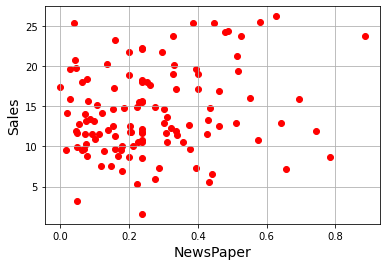

In [ ]:
plt.scatter(X_train[:,0], y_train, color='red')
plt.xlabel('NewsPaper', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(model.score(X_test, y_test))

0.7588532815925728


In [ ]:
y_pred = model.predict(X_test) 

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

6.114868492222646


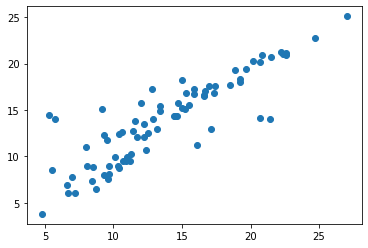

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()